In [ ]:
# code adapted and modified from:
#     Title: Modulation of cortical Up-Down state switching by astrocytes
#     Author: Lisa Blum Moyse
#     Availability: http://modeldb.yale.edu/267310,


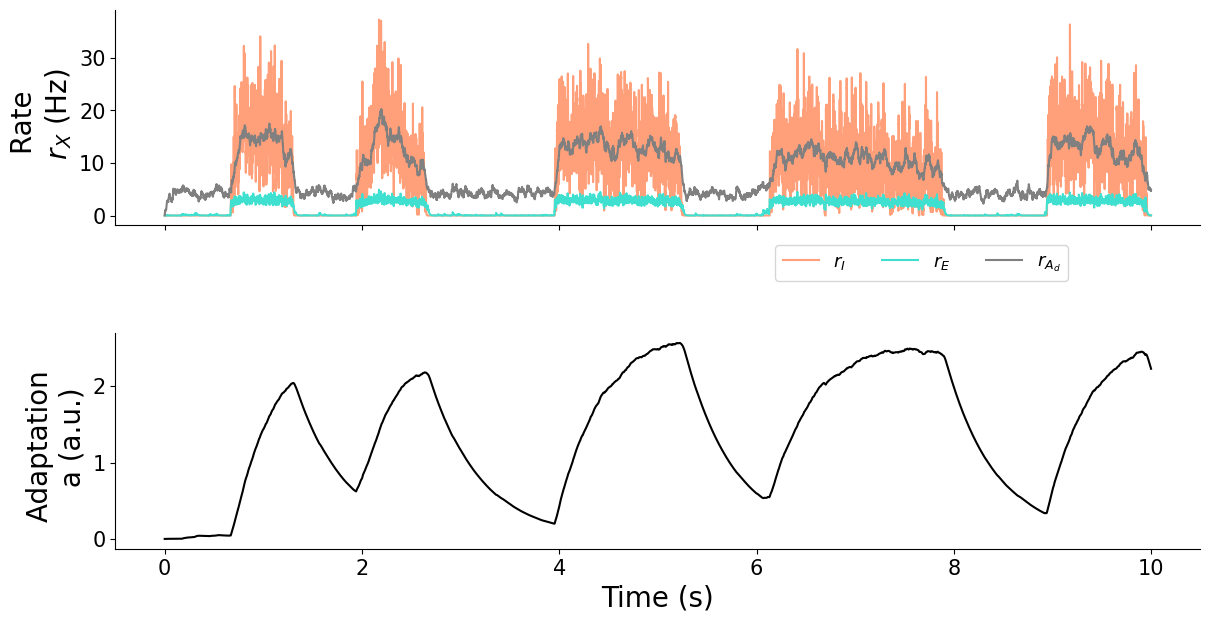

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd

# With astrocyte
Ttime = 10*1e3

ge = 1 
gi = 4
ga = 1

Jee = 5
Jei = 1
Jie = 10
Jii = 0.5

Jae = 0.5
Jai = 0.5
Jea = 1 
Jia = 0.5
Jaa = 0.1

thetae = 10.5
thetai = 25
thetaa = -3.5

taue=10
taui=2
tauastro = 20

B = 1

tauAdapt=500
sigmaN= 3.5*np.sqrt(2)

tauN = 1
nrVar = 4
dt = 0.2
nrSteps = round(Ttime/dt)

def allderivs(y,n):
    dy = [0]*nrVar
    #RE
    aux=Jee*y[0]-Jei*y[1] +Jea*y[3]-y[2]+n[0]
    if aux<=thetae:
        dy[0]=-y[0]/taue
    else:
        dy[0]=(-y[0]+ge*(aux-thetae))/taue
    #RI
    aux=Jie*y[0]-Jii*y[1]+Jia*y[3]+n[1]
    if aux<=thetai:
        dy[1]=-y[1]/taui
    else:
        dy[1]=(-y[1]+gi*(aux-thetai))/taui
    #A
    dy[2]=(-y[2]+B*y[0])/tauAdapt
    #rA
    aux = Jae*y[0]+Jai*y[1]+Jaa*y[3]+n[2]
    if aux<=thetaa:
        dy[3] = -y[3]/tauastro
    else:
        dy[3] = (-y[3]+ga*(aux-thetaa))/tauastro
        
    return(dy)

##########################   

re = []
ri = []
a = []
nre = []
nri = []
rA = []
nAux1=np.exp(-dt/tauN)
nAux2=np.sqrt(((pow(sigmaN,2))*tauN*0.5)*(1-pow(np.exp(-dt/tauN),2)))#sqrt(((2*pow(sigmaN,2)/tauN)*tauN*0.5)*(1-pow(exp(-dt/tauN),2)))
rk4Aux1=dt*0.5
rk4Aux2=dt*0.166666666

Tdt=int(1/dt)  
yAct = [0]*nrVar
noiseAct= [0]*3

for j in range(nrSteps-Tdt):
    #RK4
    aux2 = [0]*nrVar
    aux1 = allderivs(yAct,noiseAct)
    for i in range(nrVar): 
        aux2[i]=yAct[i]+rk4Aux1*aux1[i]

    aux3 = allderivs(aux2,noiseAct)
    for i in range(nrVar):
        aux2[i]=yAct[i]+rk4Aux1*aux3[i]

    aux4 = allderivs(aux2,noiseAct)
    for i in range(nrVar):
        aux2[i]=yAct[i]+dt*aux4[i]
        aux4[i] += aux3[i]

    aux3 = allderivs(aux2,noiseAct)
    for i in range(nrVar):
        yAct[i] += rk4Aux2*(aux1[i]+aux3[i]+2*aux4[i])

    #noise update
    noiseAct[0]=noiseAct[0]*nAux1+nAux2*np.random.randn()
    noiseAct[1]=noiseAct[1]*nAux1+nAux2*np.random.randn()
    noiseAct[2]=noiseAct[2]*nAux1+nAux2*np.random.randn()

    #save result
    re.append(yAct[0])
    ri.append(yAct[1])
    a.append(yAct[2])
    rA.append(yAct[3])


###
fig, ax = plt.subplots(2, figsize=(14, 7), sharex=True, gridspec_kw={'hspace': 0.5})
#fig.suptitle('A) With depolarising astrocyte population', fontsize=16, y = 0.93)

ax[0].plot(np.arange(int(nrSteps - Tdt)) * dt / 1e3, ri, color='lightsalmon', label='$r_I$')
ax[0].plot(np.arange(int(nrSteps - Tdt)) * dt / 1e3, re, color='turquoise', label='$r_E$')
ax[0].plot(np.arange(int(nrSteps - Tdt)) * dt / 1e3, rA, color='grey', label='$r_{A_d}$')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.6, -0.05), ncol=3, fontsize=13)
ax[0].set_ylabel('Rate \n $r_X$ (Hz)', fontsize=20)
ax[0].tick_params(axis='y', labelsize=15)

plt.xticks(fontsize=15)
ax[1].set_ylabel('Adaptation \n a (a.u.)', fontsize=20)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].plot(np.arange(int(nrSteps - Tdt)) * dt / 1e3, a, color='k')
plt.xlabel('Time (s)', fontsize=20)


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.show()

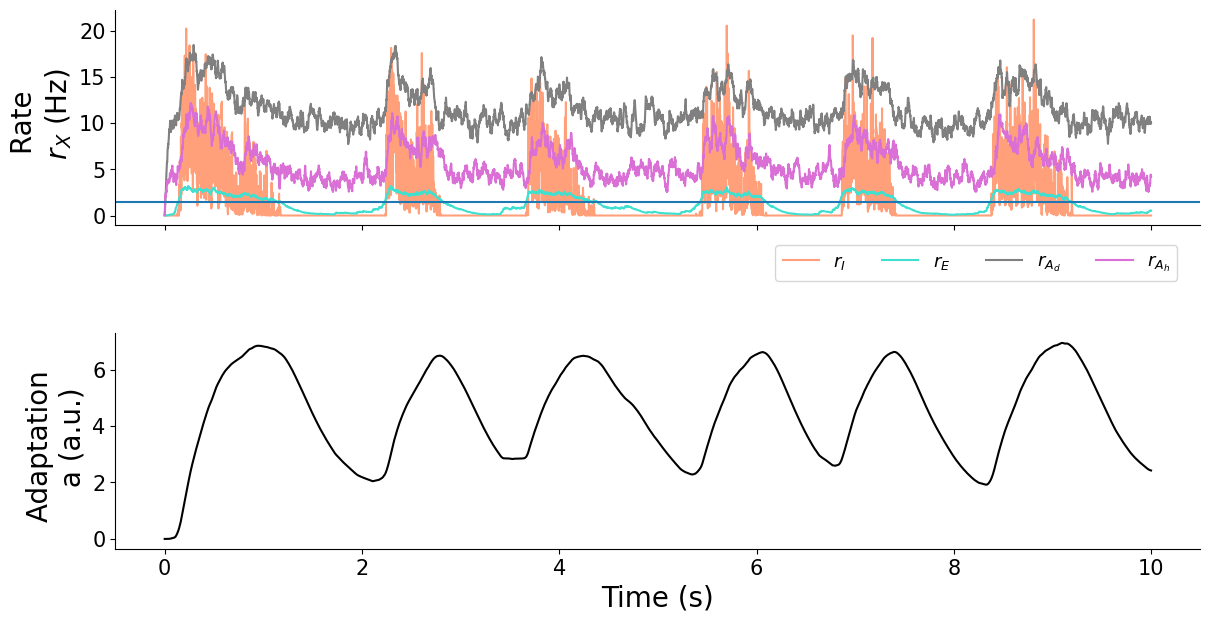

In [2]:

# With astrocyte
Ttime = 10 * 1e3

#gain
ge = 1 # gain excitatory
gi = 4 # gain inhibitory
ga = 1 # gain astrocyte
ga2 = 1 # gain astrocyte (I')

# strength
Jee = 5 # EE
Jei = 1 # IE
Jie = 10 # EI
Jii = 0.5 #II

#Astrocyte 1 = E'
Jae = 0.5 # EA
Jai = 0.5 #IA
Jea = 1 # AE
Jia = 0.5 # AI
Jaa = 0.1 # AA

#Astrocyte 2 (inhib) = I'
Jae2 = 0.5 # EA
Jai2 = 0.5 #IA
Jea2 = 1 # AE
Jia2 = 0.5 # AI
Jaa2 = 0.1 # AA

#Threshold
thetae = 7.5 #E <<-
thetai = 25 #I
thetaa = -9 #A <<-
thetaa2 = -3.5 #A

#time constant
taue = 109
taui = 2
tauastro = 20
tauastro2 = 20

# Stength Adaptation
B = 3.6 # <<--

tauAdapt = 500 # adaptation time const
sigmaN = 3.5 * np.sqrt(2) # noise

tauN = 1
nrVar = 5 # [e, i, a, adap, a2]
dt = 0.2
nrSteps = round(Ttime / dt)

def allderivs(y, n):
    dy = [0] * nrVar # [0,0,0,0,0]
    # RE
    aux = Jee * y[0] - Jei * y[1] + Jea * y[3]  - Jea2 * y[4] - y[2] + n[0]
    if aux <= thetae:
        dy[0] = -y[0] / taue
    else:
        dy[0] = (-y[0] + ge * (aux - thetae)) / taue
    # RI
    aux = Jie * y[0] - Jii * y[1] + Jia * y[3] + n[1] - Jia2 * y [4]
    if aux <= thetai:
        dy[1] = -y[1] / taui
    else:
        dy[1] = (-y[1] + gi * (aux - thetai)) / taui
    # Adapt
    dy[2] = (-y[2] + B * y[0]) / tauAdapt
    # rA
    aux = Jae * y[0] + Jai * y[1] + Jaa * y[3] + n[2]
    if aux <= thetaa:
        dy[3] = -y[3] / tauastro
    else:
        dy[3] = (-y[3] + ga * (aux - thetaa)) / tauastro

    #rA2
    aux = Jae2 * y[0] + Jai2 * y[1] + Jaa2 * y[4] + n[3]
    if aux <= thetaa2:
        dy[4] = -y[4] / tauastro2
    else:
        dy[4] = (-y[4] + ga * (aux - thetaa2)) / tauastro2

    return (dy)

re = []
ri = []
a = []
nre = []
nri = []
rA = [] # firing rate of E'
rA2 = [] # firing rate of I'
nAux1 = np.exp(-dt / tauN) # some noise variable
nAux2 = np.sqrt(((pow(sigmaN, 2)) * tauN * 0.5) * (
            1 - pow(np.exp(-dt / tauN), 2)))  # sqrt(((2*pow(sigmaN,2)/tauN)*tauN*0.5)*(1-pow(exp(-dt/tauN),2))) # some noise variable

rk4Aux1 = dt * 0.5
rk4Aux2 = dt * 0.166666666

Tdt = int(1 / dt)
yAct = [0] * nrVar # [0,0,0,0,0]
noiseAct = [0] * 4 # [0,0,0,0]

for j in range(nrSteps - Tdt):
    # RK4
    aux2 = [0] * nrVar # [0,0,0,0,0]
    aux1 = allderivs(yAct, noiseAct)
    for i in range(nrVar):
        aux2[i] = yAct[i] + rk4Aux1 * aux1[i]

    aux3 = allderivs(aux2, noiseAct)
    for i in range(nrVar):
        aux2[i] = yAct[i] + rk4Aux1 * aux3[i]

    aux4 = allderivs(aux2, noiseAct)
    for i in range(nrVar):
        aux2[i] = yAct[i] + dt * aux4[i]
        aux4[i] += aux3[i]

    aux3 = allderivs(aux2, noiseAct)
    for i in range(nrVar):
        yAct[i] += rk4Aux2 * (aux1[i] + aux3[i] + 2 * aux4[i])

    # noise update
    noiseAct[0] = noiseAct[0] * nAux1 + nAux2 * np.random.randn()
    noiseAct[1] = noiseAct[1] * nAux1 + nAux2 * np.random.randn()
    noiseAct[2] = noiseAct[2] * nAux1 + nAux2 * np.random.randn()
    noiseAct[3] = noiseAct[3] * nAux1 + nAux2 * np.random.randn()

    # save result
    re.append(yAct[0])
    ri.append(yAct[1])
    a.append(yAct[2])
    rA.append(yAct[3])
    rA2.append(yAct[4])

fig, ax = plt.subplots(2, figsize=(14, 7), sharex=True, gridspec_kw={'hspace': 0.5})
# fig.suptitle('B) With depolarising and hyperpolarising astrocyte population', fontsize=16, y = 0.93)

ax[0].plot(np.arange(int(nrSteps - Tdt)) * dt / 1e3, ri, color='lightsalmon', label='$r_I$')
ax[0].plot(np.arange(int(nrSteps - Tdt)) * dt / 1e3, re, color='turquoise', label='$r_E$')
ax[0].plot(np.arange(int(nrSteps - Tdt)) * dt / 1e3, rA, color='grey', label='$r_{A_d}$')
ax[0].plot(np.arange(int(nrSteps - Tdt)) * dt / 1e3, rA2, color='orchid', label='$r_{A_h}$')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.6, -0.05), ncol=4, fontsize=13)
ax[0].set_ylabel('Rate \n $r_X$ (Hz)', fontsize=20)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].axhline(y=1.5)

plt.xticks(fontsize=15)
ax[1].set_ylabel('Adaptation \n a (a.u.)', fontsize=20)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].plot(np.arange(int(nrSteps - Tdt)) * dt / 1e3, a, color='k')
plt.xlabel('Time (s)', fontsize=20)


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.show()